In [19]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from tqdm.auto import tqdm
# Load the dataset

weather_data = pd.read_csv('weather.csv')

# Display the first few rows of the dataset to understand its structure
weather_data.head()

,date,maxtp(Maximum Air Temperature - degrees C),mintp(Minimum Air Temperature - degrees C),gmin(Grass Minimum Temperature - degrees C),rain(Precipitation Amount - mm),cbl (Mean CBL Pressure-hpa),wdsp(Mean Wind Speed - knot),pe(Potential Evapotranspiration - mm),evap(Evaporation -mm)
0,1-Jan-42,9.7,6.8,4.7,0.0,1020.3,17.2,1.1,1.4
1,2-Jan-42,9.9,7.9,6.7,0.1,1016.2,15.2,0.7,0.9
2,3-Jan-42,11.2,8.9,7.2,1.5,1006.8,14.0,0.5,0.6
3,4-Jan-42,9.2,2.7,3.4,3.5,1001.5,17.0,0.6,0.7
4,5-Jan-42,3.5,-0.8,0,0.6,1013.4,13.0,0.6,0.7


In [20]:
# Checking the data types and for missing values
data_info = weather_data.info()

# Converting the 'date' column to datetime format and check the date range
weather_data['date'] = pd.to_datetime(weather_data['date'], format='%d-%b-%y',errors='coerce')
date_range = weather_data['date'].agg(['min', 'max'])

data_info, date_range


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29889 entries, 0 to 29888
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   date                                         29889 non-null  object 
 1   maxtp(Maximum Air Temperature - degrees C)   29889 non-null  float64
 2   mintp(Minimum Air Temperature - degrees C)   29889 non-null  float64
 3   gmin(Grass Minimum Temperature - degrees C)  29889 non-null  object 
 4   rain(Precipitation Amount - mm)              29889 non-null  float64
 5   cbl (Mean CBL Pressure-hpa)                  29889 non-null  float64
 6   wdsp(Mean Wind Speed - knot)                 29889 non-null  float64
 7   pe(Potential Evapotranspiration - mm)        29889 non-null  float64
 8   evap(Evaporation -mm)                        29889 non-null  object 
dtypes: float64(6), object(3)
memory usage: 2.1+ MB


(None,
 min   1969-01-01
 max   2068-12-31
 Name: date, dtype: datetime64[ns])

In [21]:
# Investigating the unique values in 'gmin' and 'evap' columns to understand the non-numeric entries
gmin_unique_values = weather_data['gmin(Grass Minimum Temperature - degrees C)'].unique()
evap_unique_values = weather_data['evap(Evaporation -mm)'].unique()

# Correcting the date range
corrected_weather_data = weather_data[weather_data['date'] <= pd.Timestamp('2023-10-31')]

# Check the new date range after correction
new_date_range = corrected_weather_data['date'].agg(['min', 'max'])

gmin_unique_values[:10], evap_unique_values[:10], new_date_range  # Displaying the first 10 unique values for brevity


(array(['4.7', '6.7', '7.2', '3.4', '0', '-3.7', '-1', '0.2', '0.9',
        '-4.1'], dtype=object),
 array(['1.4', '0.9', '0.6', '0.7', '0.5', '0.2', '0.1', '0.3', '0', '0.4'],
       dtype=object),
 min   1969-01-01
 max   2023-10-31
 Name: date, dtype: datetime64[ns])

In [22]:
# Converting 'gmin' and 'evap' columns to numeric data types
corrected_weather_data['gmin(Grass Minimum Temperature - degrees C)'] = pd.to_numeric(corrected_weather_data['gmin(Grass Minimum Temperature - degrees C)'], errors='coerce')
corrected_weather_data['evap(Evaporation -mm)'] = pd.to_numeric(corrected_weather_data['evap(Evaporation -mm)'], errors='coerce')

# Rechecking the data types after conversion
corrected_data_types = corrected_weather_data.dtypes

# Basic statistical overview of the dataset
basic_statistics = corrected_weather_data.describe()

corrected_data_types, basic_statistics


/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_94155/3257759036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_weather_data['gmin(Grass Minimum Temperature - degrees C)'] = pd.to_numeric(corrected_weather_data['gmin(Grass Minimum Temperature - degrees C)'], errors='coerce')
/var/folders/5n/3l5vl9wj3r15r10n9kmktsn00000gn/T/ipykernel_94155/3257759036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_weather_data['evap(Evaporation -mm)'] = pd.to_numeric(corrected_weather_

(date                                           datetime64[ns]
 maxtp(Maximum Air Temperature - degrees C)            float64
 mintp(Minimum Air Temperature - degrees C)            float64
 gmin(Grass Minimum Temperature - degrees C)           float64
 rain(Precipitation Amount - mm)                       float64
 cbl (Mean CBL Pressure-hpa)                           float64
 wdsp(Mean Wind Speed - knot)                          float64
 pe(Potential Evapotranspiration - mm)                 float64
 evap(Evaporation -mm)                                 float64
 dtype: object,
                       date  maxtp(Maximum Air Temperature - degrees C)  \
 count                20027                                20027.000000   
 mean   1996-06-01 00:00:00                                   13.231163   
 min    1969-01-01 00:00:00                                   -4.700000   
 25%    1982-09-16 12:00:00                                    9.600000   
 50%    1996-06-01 00:00:00               

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting plot style
sns.set(style="whitegrid")

# Extracting the 'date' and 'maxtp' columns
maxtp_data = corrected_weather_data[['date', 'maxtp(Maximum Air Temperature - degrees C)']].set_index('date')

# Decomposing the time series into trend, seasonal, and residual components
decomposition = seasonal_decompose(maxtp_data, model='additive', period=365)


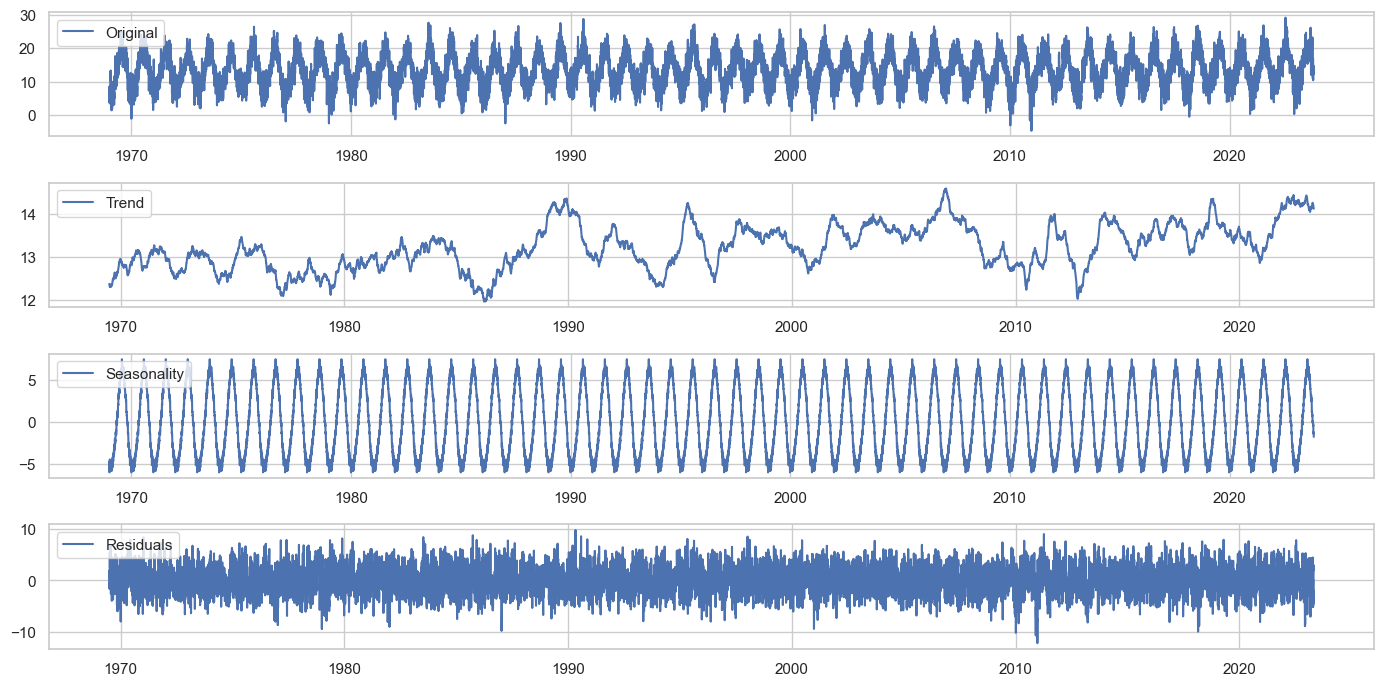

In [25]:
# Plotting the decomposed time series components
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(maxtp_data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()

In [26]:
from statsmodels.tsa.stattools import adfuller

# Performing the Augmented Dickey-Fuller test
adf_test = adfuller(maxtp_data['maxtp(Maximum Air Temperature - degrees C)'])

# Extracting the p-value from the test results
adf_p_value = adf_test[1]

adf_p_value

3.420616863504843e-19

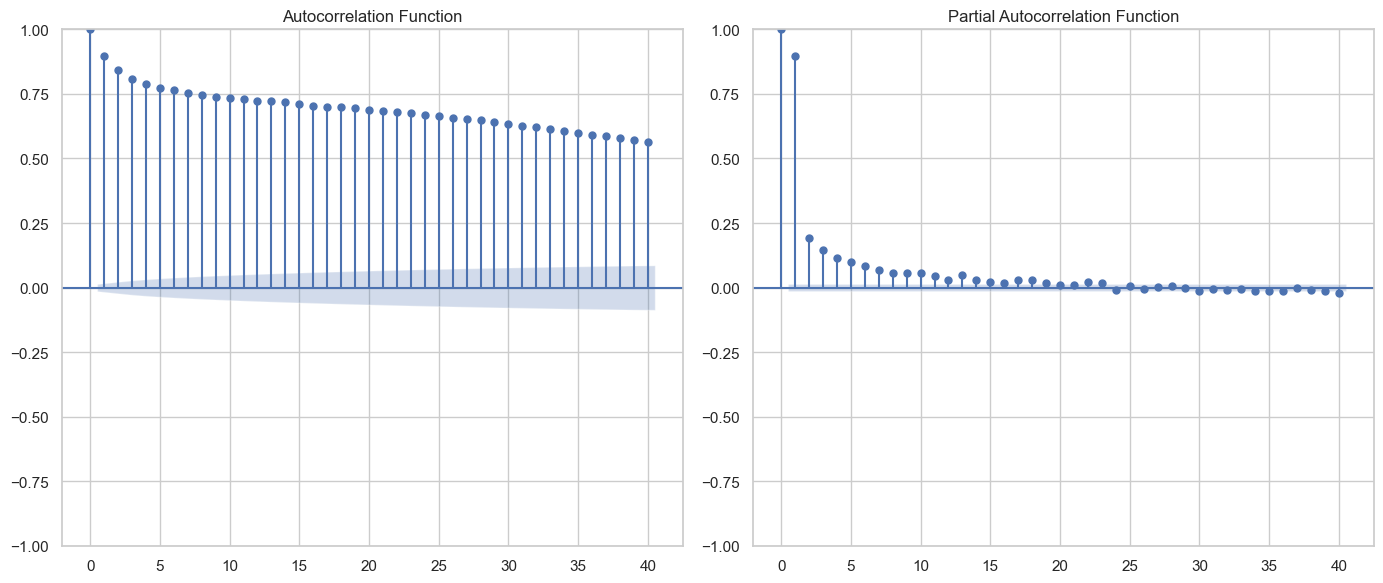

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the Autocorrelation and Partial Autocorrelation
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(maxtp_data, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function')

plt.subplot(122)
plot_pacf(maxtp_data, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

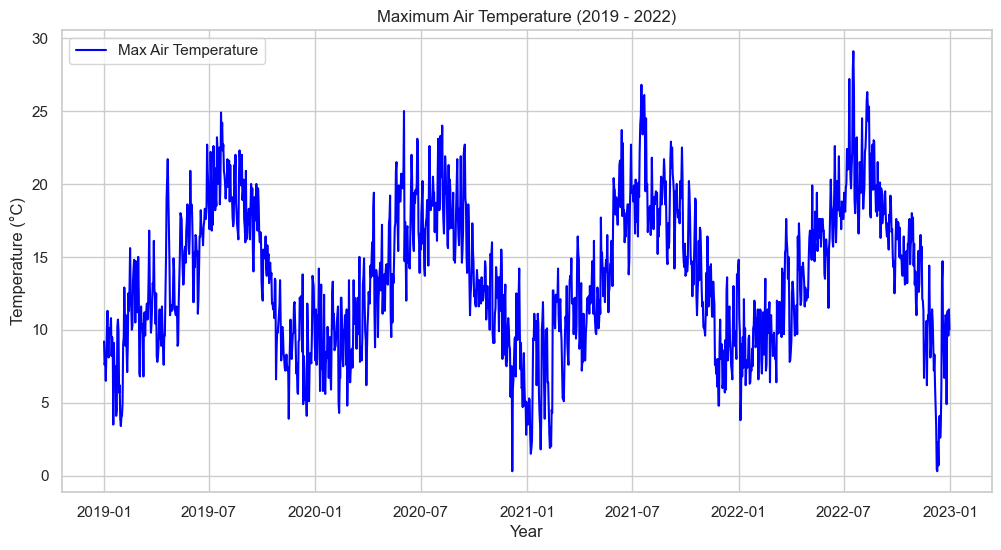

In [28]:
# Filtering the data for the preliminary assessment period (2019-2022)
assessment_data = maxtp_data[(maxtp_data.index >= '2019-01-01') & (maxtp_data.index <= '2022-12-31')]

# Plotting the time series data from 2019 to 2022
plt.figure(figsize=(12, 6))
plt.plot(assessment_data, label='Max Air Temperature', color='blue')
plt.title('Maximum Air Temperature (2019 - 2022)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


In [29]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [30]:
# Preparing the training and test sets
train_data = maxtp_data[(maxtp_data.index >= '2019-01-01') & (maxtp_data.index <= '2022-12-31')]
test_data = maxtp_data[(maxtp_data.index >= '2023-01-01') & (maxtp_data.index <= '2023-10-31')]


In [31]:
# Simple Time Series Models
# 1. Naive Model
naive_forecast = np.tile(train_data.iloc[-1], len(test_data))


In [32]:
# 2. Simple Moving Average (SMA) - Using a window of 30 days
sma_forecast = train_data.rolling(window=30).mean().iloc[-1]
sma_forecast = np.tile(sma_forecast, len(test_data))

In [33]:
# Exponential Smoothing Model
# Using an additive trend and additive seasonality with a yearly cycle
es_model = ExponentialSmoothing(train_data, trend="add", seasonal="add", seasonal_periods=365).fit()
es_forecast = es_model.forecast(len(test_data))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [34]:
# ARIMA/SARIMA Model
# Fitting a seasonal ARIMA model
sarima_model = ARIMA(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_forecast = sarima_model.forecast(len(test_data))


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [35]:
# Calculating Mean Squared Error (MSE) for each model
mse_naive = mean_squared_error(test_data, naive_forecast)
mse_sma = mean_squared_error(test_data, sma_forecast)
mse_es = mean_squared_error(test_data, es_forecast)
mse_sarima = mean_squared_error(test_data, sarima_forecast)

mse_naive, mse_sma, mse_es, mse_sarima

(48.075592105263155, 84.58149619883042, 9.187373706821456, 57.19469369662298)